In [1]:
import numpy as np
import vtk
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from plyfile import PlyData, PlyElement

In [5]:
filename = "Centerline model_d6.vtk"
reader = vtk.vtkStructuredPointsReader()
reader.SetFileName(filename)
reader.Update()

points = np.array(reader.GetOutput().GetPoints().GetData())

AttributeError: 'vtkmodules.vtkCommonDataModel.vtkStructuredPoints' object has no attribute 'GetPoints'

In [6]:
test_data = mesh.Mesh.from_file('Centerline model_d6.stl')

C:\Users\bernh\AppData\Local\Temp\ipykernel_1852\3382307156.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes =mplot3d.Axes3D(figure)


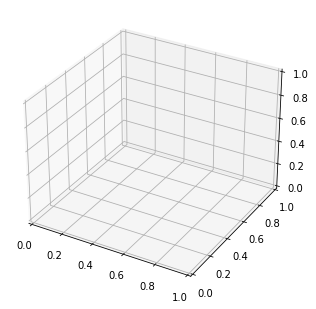

In [9]:
figure = plt.figure()
axes =mplot3d.Axes3D(figure)

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(test_data.vectors))


plt.show()

In [ ]:
test_data

In [4]:
plydata = PlyData.read('Centerline model.ply')

In [2]:
import numpy as np
import open3d as o3d

pcd = o3d.io.read_point_cloud('Centerline model.ply')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
o3d.visualization.draw_geometries([pcd])

In [3]:
pc_in_np = np.asanyarray(pcd.points)

In [4]:
import nrrd
nrrd.write('test_centerline.nrrd', pc_in_np)

In [5]:
print(pc_in_np)

[[  83.08914185   -5.81561756 -671.08538818]
 [  83.1322937    -5.93926668 -669.85961914]
 [  83.13339233   -5.94238329 -669.83117676]
 ...
 [  10.4648695    -3.30447674 -181.42626953]
 [  10.86108208   -2.54726577 -183.51325989]
 [  11.21024609   -2.24075222 -184.92829895]]


In [12]:
data, h = nrrd.read('OutputVolume.nrrd')

In [14]:
print(np.min(data))

0


In [6]:
import nrrd
import edt
label, h = nrrd.read('./ground/D1.seg.nrrd')

dist = edt.edt(label, black_border=True)

In [7]:
nrrd.write('test_dist.nrrd', dist)